# Finding Heavy Traffic Indicators on I-94

Corresponds to DataQuest guided project.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
#matplotlib inline

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = Path.home() / "datasets" / "tabular_practice"

traffic = pd.read_csv(data_path / "Metro_Interstate_Traffic_Volume.csv")

In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
traffic["holiday"].value_counts(dropna=False)

holiday
NaN                          48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: count, dtype: int64

In [5]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [6]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

In [7]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [8]:
traffic.describe(include="all")

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,NaN,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,NaN,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,2016-01-05 10:46:16.773711616,3259.818355
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2012-10-02 09:00:00,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,2014-02-06 11:45:00,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,2016-06-11 03:30:00,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,2017-08-11 06:00:00,4933.000000
max,NaN,310.070000,9831.300000,0.510000,100.000000,NaN,NaN,2018-09-30 23:00:00,7280.000000


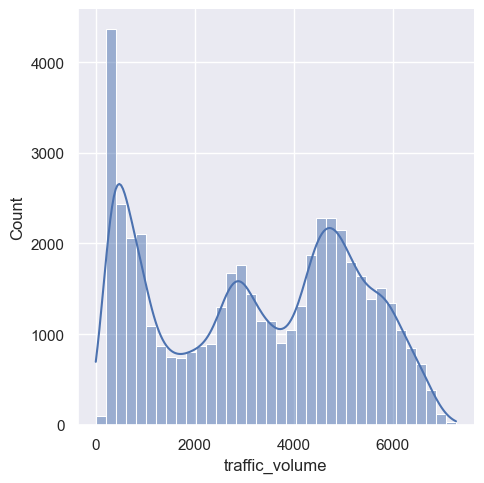

In [11]:
sns.set()
sns.displot(traffic["traffic_volume"], kde=True)

The marginal distribution of `traffic_volume` has 3 modes, corresponding to low, medium, and heavy traffic.

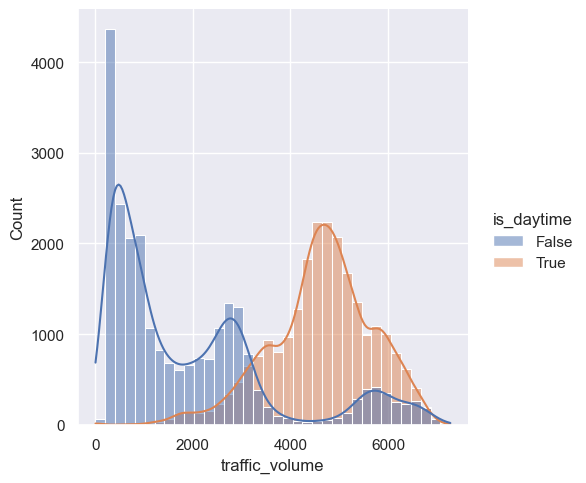

In [27]:
hour_of_day = traffic["date_time"].dt.hour
traffic["is_daytime"] = (hour_of_day > 7) & (hour_of_day <= 19)
sns.displot(data=traffic, x="traffic_volume", kde=True, hue="is_daytime")

The third peak (heavy traffic) is mostly due to day-time traffic, even though the night-time histogram has a certain tail of heavy traffic as well.

<Axes: ylabel='month_num'>

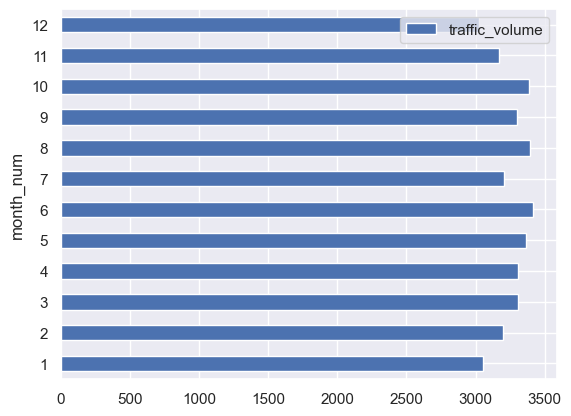

In [39]:
traffic["month"] = traffic["date_time"].dt.strftime("%B")
traffic["month_num"] = traffic["date_time"].dt.month
traffic.groupby("month_num").agg({"traffic_volume": "mean"}).plot.barh()

<Axes: >

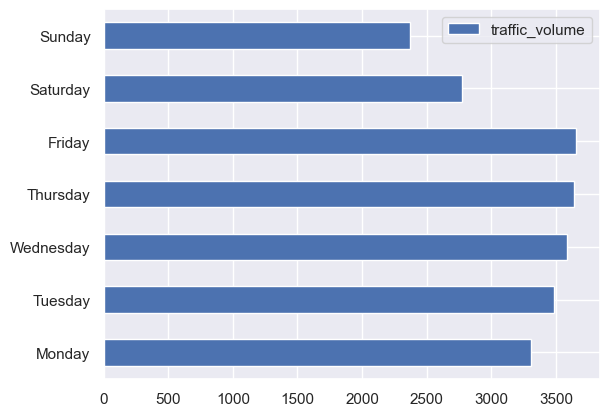

In [41]:
from datetime import datetime

traffic["day_of_week"] = traffic["date_time"].dt.dayofweek
avg_traffic_per_day = traffic.groupby("day_of_week").agg({"traffic_volume": "mean"})
avg_traffic_per_day.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_traffic_per_day.plot.barh()

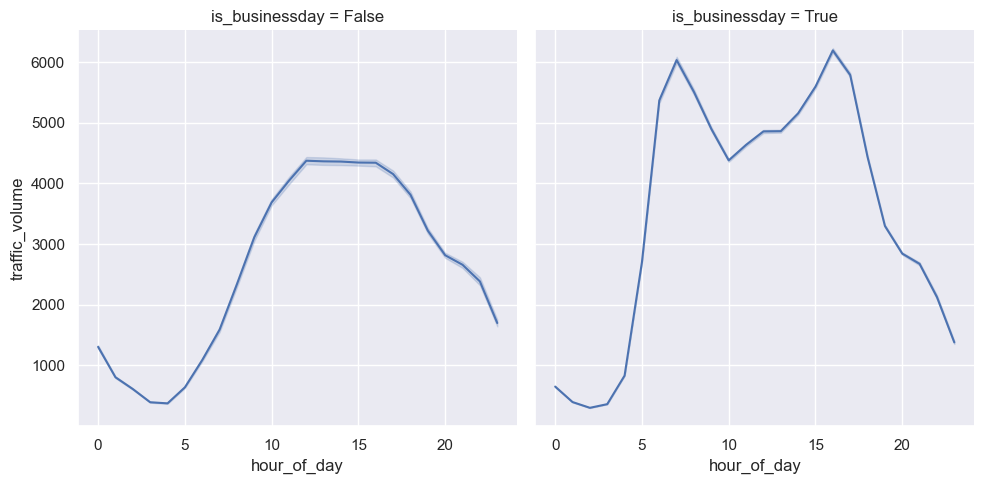

In [45]:
traffic["is_businessday"] = traffic["day_of_week"] <= 4
traffic["hour_of_day"] = traffic["date_time"].dt.hour
sns.relplot(data=traffic, x="hour_of_day", y="traffic_volume", col="is_businessday", kind="line")

In [47]:
columns = ["traffic_volume", "temp", "rain_1h", "snow_1h", "clouds_all", "weather_main", "weather_description"]
traffic[columns].corr(numeric_only=True)["traffic_volume"]

traffic_volume    1.000000
temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
Name: traffic_volume, dtype: float64

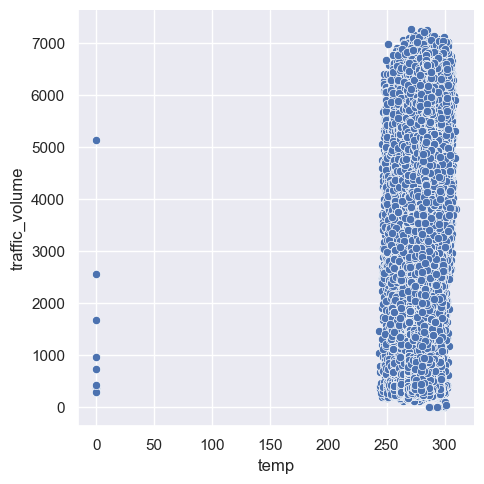

In [48]:
sns.relplot(data=traffic, x="temp", y="traffic_volume")

In [49]:
traffic[["traffic_volume", "temp"]].query("temp > 100").corr()

,traffic_volume,temp
traffic_volume,1.000000,0.132291
temp,0.132291,1.000000


In [50]:
traffic.nunique()

holiday                   11
temp                    5843
rain_1h                  372
snow_1h                   12
clouds_all                60
weather_main              11
weather_description       38
date_time              40575
traffic_volume          6704
is_daytime                 2
month                     12
month_num                 12
day_of_week                7
is_businessday             2
time_of_day               24
hour_of_day               24
dtype: int64

In [64]:
patt = "|".join(traffic["weather_main"].value_counts().index[:5])
indic = traffic["weather_main"].str.contains(patt)
traffic_part = traffic[indic]

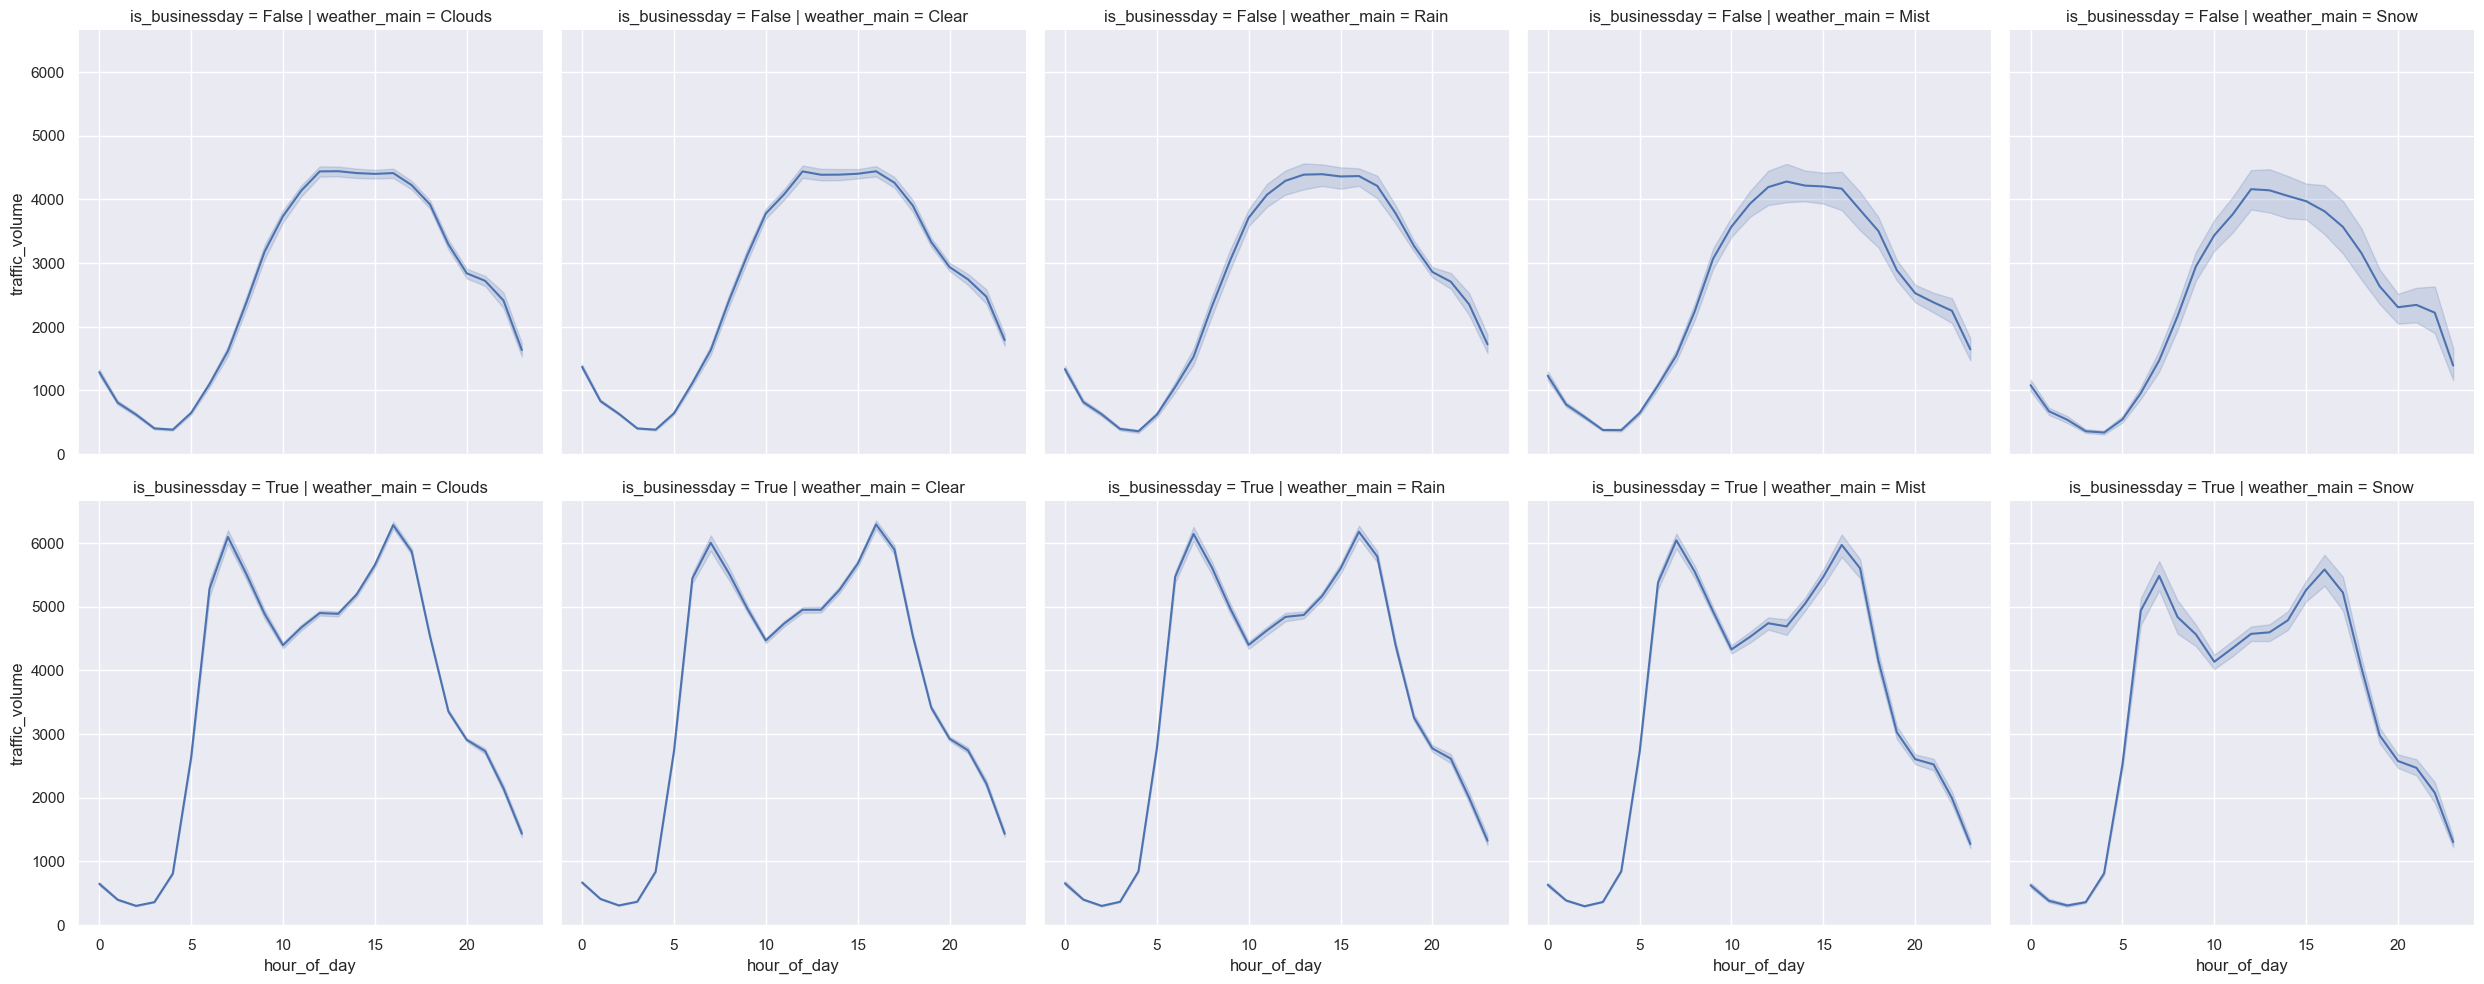

In [69]:
sns.relplot(data=traffic_part, x="hour_of_day", y="traffic_volume", col="weather_main", row="is_businessday", kind="line")

In [55]:
traffic.query("weather_main == 'Clouds'")["weather_description"].value_counts()

weather_description
overcast clouds     5081
broken clouds       4666
scattered clouds    3461
few clouds          1956
Name: count, dtype: int64

In [56]:
traffic.query("weather_main == 'Clear'")["weather_description"].value_counts()

weather_description
sky is clear    11665
Sky is Clear     1726
Name: count, dtype: int64

In [60]:
by_weather_main = traffic.groupby('weather_main').agg({"traffic_volume": "mean"})
by_weather_main

,traffic_volume
weather_main,
Clear,3055.908819
Clouds,3618.449749
Drizzle,3290.727073
Fog,2703.720395
Haze,3502.101471
Mist,2932.956639
Rain,3317.905501
Smoke,3237.650000
Snow,3016.844228


<Axes: ylabel='weather_main'>

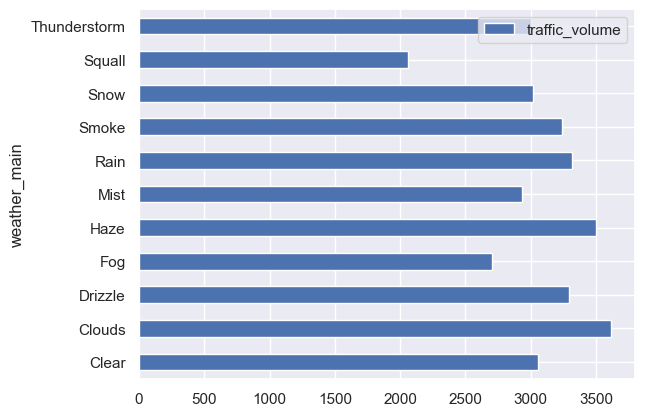

In [61]:
by_weather_main.plot.barh()

In [70]:
traffic["weather_description"].value_counts()

weather_description
sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain       

In [73]:
indic = traffic["weather_description"] == 'Sky is Clear'
traffic.loc[indic, "weather_description"] = "sky is clear"
traffic["weather_description"].value_counts()

weather_description
sky is clear                           13391
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thunderstorm with light rain       

In [76]:
traffic.groupby("weather_description")["traffic_volume"].describe()[["count", "mean", "min", "max"]]

,count,mean,min,max
weather_description,,,,
SQUALLS,4.0,2061.750000,400.0,4211.0
broken clouds,4666.0,3661.142092,1.0,7213.0
drizzle,651.0,3094.858679,213.0,7110.0
few clouds,1956.0,3691.453476,2.0,7139.0
fog,912.0,2703.720395,10.0,7067.0
freezing rain,2.0,4314.000000,3866.0,4762.0
haze,1360.0,3502.101471,0.0,7192.0
heavy intensity drizzle,64.0,3371.109375,250.0,7068.0
heavy intensity rain,467.0,3140.072805,2.0,6844.0
